# Data Loading and Merging Together

In [5]:
import pandas as pd

Dataset Link: https://www.kaggle.com/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset/data

In [6]:
order_product_df = pd.read_csv("/kaggle/input/instacart-online-grocery-basket-analysis-dataset/order_products__prior.csv")
orders_df = pd.read_csv("/kaggle/input/instacart-online-grocery-basket-analysis-dataset/orders.csv")
products_df = pd.read_csv("/kaggle/input/instacart-online-grocery-basket-analysis-dataset/products.csv")
aisles_df = pd.read_csv("/kaggle/input/instacart-online-grocery-basket-analysis-dataset/aisles.csv")
departments_df = pd.read_csv("/kaggle/input/instacart-online-grocery-basket-analysis-dataset/departments.csv")

In [7]:
merged_data = pd.merge(orders_df, order_product_df, on='order_id')
merged_data = pd.merge(merged_data,products_df,on='product_id')

In [8]:
merged_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7


# Visualisation

1. Visualizing the distribution of the number of items in each order can provide insights into the typical basket size of customers.

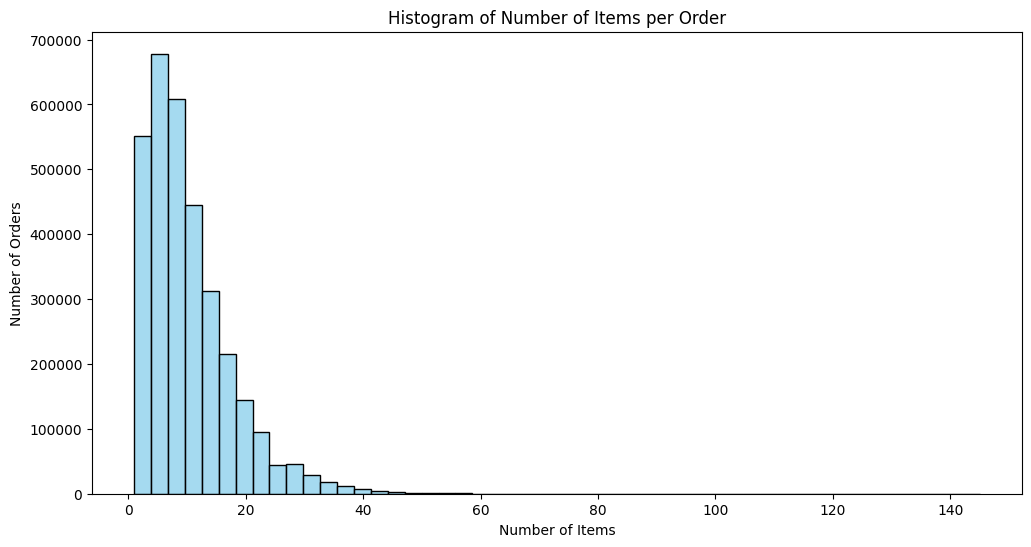

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

order_counts = merged_data.groupby('order_id').size()

plt.figure(figsize=(12, 6))
sns.histplot(order_counts, bins=50, kde=False, color='skyblue')
plt.title('Histogram of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.show()

2. Identifying the most frequently purchased products can help in understanding the most popular items.

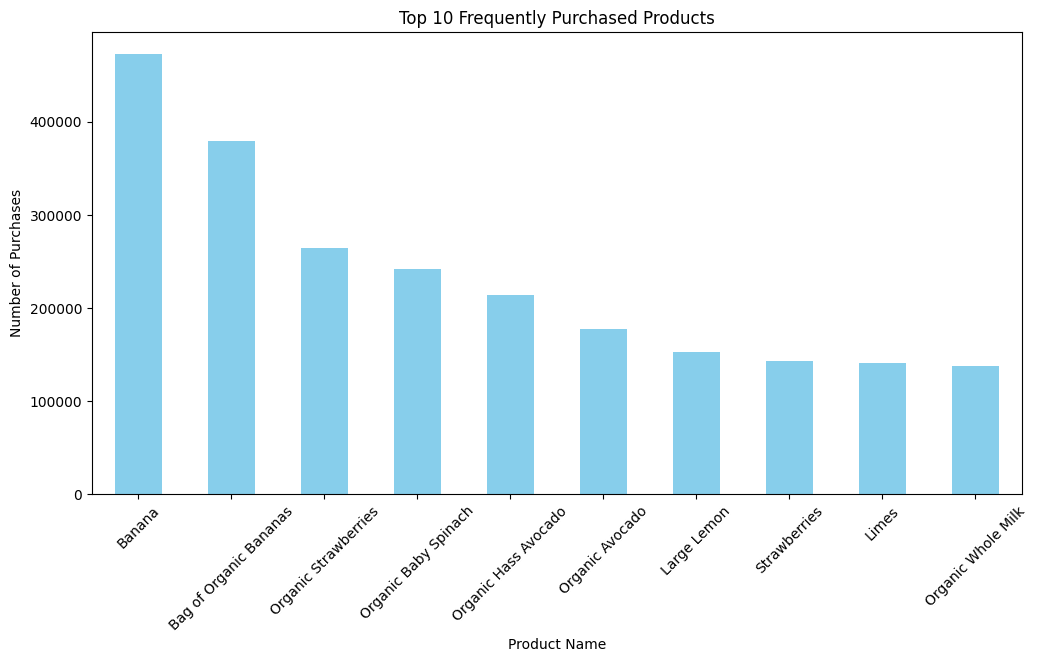

In [10]:
N = 10  # Top N products
top_products = merged_data['product_name'].value_counts().head(N)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Frequently Purchased Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


3. The data contains information about the day of the week when the order was placed, we understand the insights into shopping patterns.

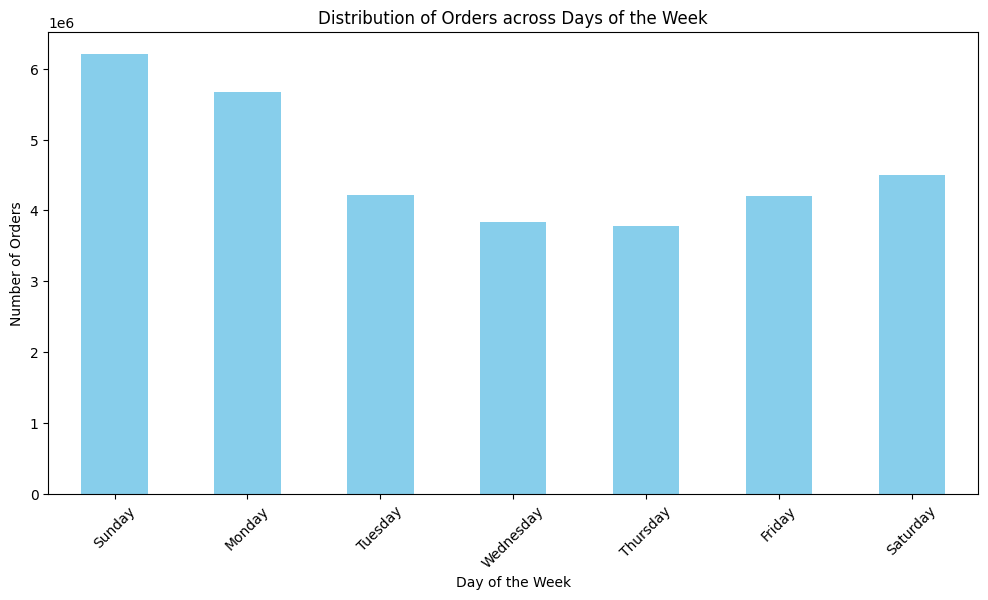

In [11]:
dow_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
order_dow_counts = merged_data['order_dow'].value_counts().sort_index().rename(index=dow_mapping)

plt.figure(figsize=(12, 6))
order_dow_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Orders across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


4. The data contains information about the day of the week when the order was placed, we understand more about the shopping patterns.

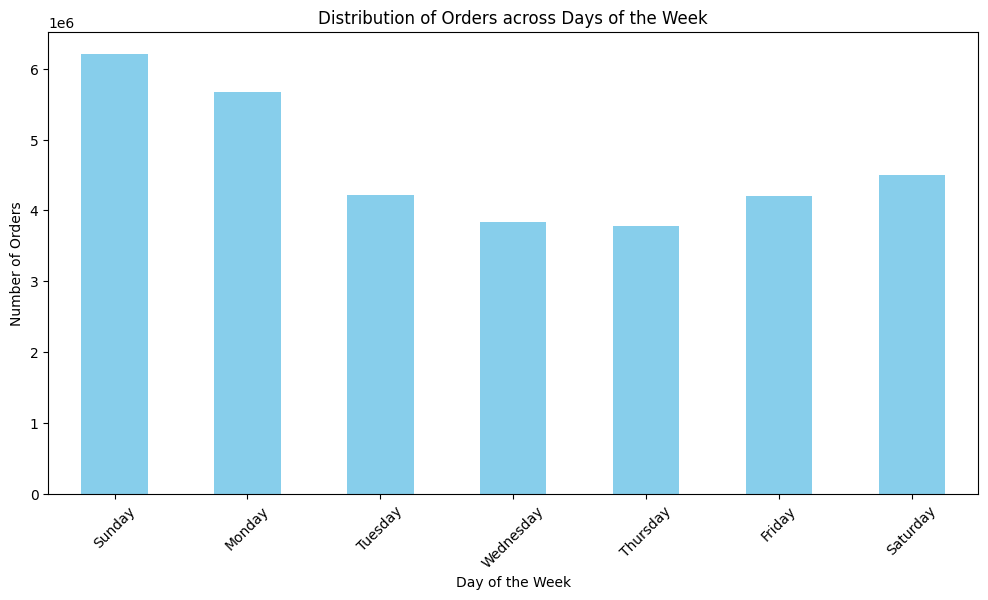

In [12]:
dow_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
order_dow_counts = merged_data['order_dow'].value_counts().sort_index().rename(index=dow_mapping)

plt.figure(figsize=(12, 6))
order_dow_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Orders across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Processing

We will do some processing and narrow down the dataset. Note that we did not do this earlier, else we might not have obtained correct visualisations since we will remove some rows.

In [13]:
merged_data.drop('eval_set', axis=1, inplace=True)

In [14]:
merged_data = merged_data.sample(frac=0.005)

In [15]:
len(merged_data["product_name"].value_counts())

19714

19895 is the number of total unique products in out dataset. Considering limited resources, we will choose only 100 products to create the rules.

In [16]:
product_counts = merged_data['product_name'].value_counts()
top_products = product_counts.head(100).index.tolist()

top_products

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Limes',
 'Strawberries',
 'Organic Raspberries',
 'Organic Whole Milk',
 'Organic Yellow Onion',
 'Organic Garlic',
 'Organic Blueberries',
 'Organic Fuji Apple',
 'Cucumber Kirby',
 'Organic Zucchini',
 'Organic Lemon',
 'Apple Honeycrisp Organic',
 'Organic Baby Carrots',
 'Carrots',
 'Organic Grape Tomatoes',
 'Seedless Red Grapes',
 'Fresh Cauliflower',
 'Honeycrisp Apple',
 'Original Hummus',
 'Organic Half & Half',
 'Sparkling Water Grapefruit',
 'Yellow Onions',
 'Organic Small Bunch Celery',
 'Organic Gala Apples',
 'Organic Cucumber',
 'Organic Large Extra Fancy Fuji Apple',
 'Half & Half',
 'Organic Baby Arugula',
 'Michigan Organic Kale',
 'Organic Red Onion',
 'Organic Tomato Cluster',
 'Organic Red Bell Pepper',
 'Organic Cilantro',
 'Organic Blackberries',
 'Asparagus',
 '100% Whole Wheat Bread',
 'Organic Italian Parsley B

We have printed the list of 100 top products we will be making rules on.

In [17]:
merged_data = merged_data[merged_data['product_name'].isin(top_products)]

Now, let us convert these to a Matrix, so that the algorithm can understand antecedents and consequents.

In [18]:
basket_data = merged_data.groupby(['order_id', 'product_name'])['reordered'].count().unstack().reset_index().fillna(0).set_index('order_id')

basket_data = basket_data.applymap(lambda x: 1 if x > 0 else 0)

basket_data.head(100)

product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,...,Soda,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
60,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8807,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8851,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training

In [19]:
from mlxtend.frequent_patterns import apriori
basket_sample = basket_data
frequent_itemsets = apriori(basket_sample, min_support=0.000001, use_colnames=True)

frequent_itemsets

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.004860,(100% Raw Coconut Water)
1,0.008397,(100% Whole Wheat Bread)
2,0.005319,(2% Reduced Fat Milk)
3,0.011233,(Apple Honeycrisp Organic)
4,0.008559,(Asparagus)
...,...,...
454,0.000027,"(Sparkling Water Grapefruit, Strawberries)"
455,0.000027,"(Bag of Organic Bananas, Organic Hass Avocado,..."
456,0.000027,"(Sparkling Water Grapefruit, Organic Strawberr..."
457,0.000027,"(Organic Lemon, Organic Italian Parsley Bunch,..."


- Support indicates how frequently the itemset appears in the dataset.
- Itemsets is a list of one or more items (products) that constitute the itemset.

The first value of 0.0048 says, (100% Raw Coconut Water) is present in roughly 0.0048x100 = 0.5% of total orders. 

Similarly, for the last values (Garlic, Banana, Organic Grape Tomatoes), we have a support. We can also understand this as Product Popularity.


The reason Support scores are less, is becase of diversity of products. Feel free to narrow down the products from 100 to 10 and increase threshold for better support. 

In [20]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.00001)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bag of Organic Bananas),(100% Raw Coconut Water),0.052005,0.004860,0.000027,0.000519,0.106828,-0.000226,0.995657,-0.898162
1,(100% Raw Coconut Water),(Bag of Organic Bananas),0.004860,0.052005,0.000027,0.005556,0.106828,-0.000226,0.953291,-0.893636
2,(Organic Garlic),(100% Raw Coconut Water),0.014365,0.004860,0.000027,0.001880,0.386748,-0.000043,0.997014,-0.616678
3,(100% Raw Coconut Water),(Organic Garlic),0.004860,0.014365,0.000027,0.005556,0.386748,-0.000043,0.991142,-0.614407
4,(Organic Hass Avocado),(100% Raw Coconut Water),0.028973,0.004860,0.000054,0.001864,0.383504,-0.000087,0.996998,-0.623423
...,...,...,...,...,...,...,...,...,...,...
729,"(Organic Small Bunch Celery, Organic Italian P...",(Organic Garlic),0.000027,0.014365,0.000027,1.000000,69.614662,0.000027,inf,0.985662
730,"(Organic Garlic, Organic Italian Parsley Bunch)",(Organic Small Bunch Celery),0.000027,0.009910,0.000027,1.000000,100.912807,0.000027,inf,0.990117
731,(Organic Small Bunch Celery),"(Organic Garlic, Organic Italian Parsley Bunch)",0.009910,0.000027,0.000027,0.002725,100.912807,0.000027,1.002705,1.000000
732,(Organic Garlic),"(Organic Small Bunch Celery, Organic Italian P...",0.014365,0.000027,0.000027,0.001880,69.614662,0.000027,1.001856,1.000000


We have sorted the rules based on "lift", which signifies, if lift is 1 means no association between products. Lift greater than 1 indicates a positive relationship, while less than 1 indicates a negative relationship.

Products with strong positive association (high lift, positive Zhang's Metric) can be promoted together, placed next to each other in physical stores, or bundled together in offers. And vice versa for negative association. 

In [21]:
rules_sorted = rules.sort_values(by='confidence', ascending=False)
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
717,"(Sparkling Water Grapefruit, Cucumber Kirby)",(Organic Strawberries),0.000027,0.035642,0.000027,1.000000,28.056818,0.000026,inf,0.964384
712,"(Organic Hass Avocado, Large Lemon)",(Bag of Organic Bananas),0.000027,0.052005,0.000027,1.000000,19.228972,0.000026,inf,0.948021
728,"(Organic Small Bunch Celery, Organic Garlic)",(Organic Italian Parsley Bunch),0.000027,0.008019,0.000027,1.000000,124.696970,0.000027,inf,0.992007
729,"(Organic Small Bunch Celery, Organic Italian P...",(Organic Garlic),0.000027,0.014365,0.000027,1.000000,69.614662,0.000027,inf,0.985662
730,"(Organic Garlic, Organic Italian Parsley Bunch)",(Organic Small Bunch Celery),0.000027,0.009910,0.000027,1.000000,100.912807,0.000027,inf,0.990117
...,...,...,...,...,...,...,...,...,...,...
154,(Banana),(Strawberries),0.063210,0.019198,0.000027,0.000427,0.022251,-0.001187,0.981221,-0.979127
152,(Banana),(Sparkling Water Grapefruit),0.063210,0.010153,0.000027,0.000427,0.042075,-0.000615,0.990270,-0.960480
146,(Banana),(Organic Whole String Cheese),0.063210,0.007047,0.000027,0.000427,0.060614,-0.000418,0.993377,-0.942999
150,(Banana),(Seedless Red Grapes),0.063210,0.010774,0.000027,0.000427,0.039650,-0.000654,0.989649,-0.962763


Now we sort by confidence, here, towards the end we also see strong negative correlations. 

In [22]:
top_rules_by_confidence = rules.sort_values(by='confidence', ascending=False).head(10)
top_rules_by_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
717,"(Sparkling Water Grapefruit, Cucumber Kirby)",(Organic Strawberries),0.000027,1.0,28.056818
712,"(Organic Hass Avocado, Large Lemon)",(Bag of Organic Bananas),0.000027,1.0,19.228972
728,"(Organic Small Bunch Celery, Organic Garlic)",(Organic Italian Parsley Bunch),0.000027,1.0,124.696970
729,"(Organic Small Bunch Celery, Organic Italian P...",(Organic Garlic),0.000027,1.0,69.614662
730,"(Organic Garlic, Organic Italian Parsley Bunch)",(Organic Small Bunch Celery),0.000027,1.0,100.912807
711,"(Bag of Organic Bananas, Large Lemon)",(Organic Hass Avocado),0.000027,1.0,34.515377
723,"(Organic Cilantro, Organic Lemon)",(Organic Italian Parsley Bunch),0.000027,1.0,124.696970
724,"(Organic Italian Parsley Bunch, Organic Cilantro)",(Organic Lemon),0.000027,1.0,79.304069
722,"(Organic Italian Parsley Bunch, Organic Lemon)",(Organic Cilantro),0.000027,1.0,115.015528
718,"(Organic Strawberries, Cucumber Kirby)",(Sparkling Water Grapefruit),0.000027,1.0,98.497340


Finally, based on multiple factors, we display top 10 product rules. 

One interpretaion could be like:
After buying : (Banana, Seedless Red Grapes) -> Person is likely to buy: (Extra Virgin Olive Oil)

# Saving Model

Let us save the model to use it in varied applications like recommendation systems and so on.

In [23]:
import pickle
rules.to_pickle("association_rules.pkl")

# Loading Back

In [24]:
loaded_rules = pd.read_pickle("association_rules.pkl")
top_rules_by_confidence = loaded_rules.sort_values(by='confidence', ascending=False).head(10)
top_rules_by_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
717,"(Sparkling Water Grapefruit, Cucumber Kirby)",(Organic Strawberries),0.000027,1.0,28.056818
712,"(Organic Hass Avocado, Large Lemon)",(Bag of Organic Bananas),0.000027,1.0,19.228972
728,"(Organic Small Bunch Celery, Organic Garlic)",(Organic Italian Parsley Bunch),0.000027,1.0,124.696970
729,"(Organic Small Bunch Celery, Organic Italian P...",(Organic Garlic),0.000027,1.0,69.614662
730,"(Organic Garlic, Organic Italian Parsley Bunch)",(Organic Small Bunch Celery),0.000027,1.0,100.912807
711,"(Bag of Organic Bananas, Large Lemon)",(Organic Hass Avocado),0.000027,1.0,34.515377
723,"(Organic Lemon, Organic Cilantro)",(Organic Italian Parsley Bunch),0.000027,1.0,124.696970
724,"(Organic Italian Parsley Bunch, Organic Cilantro)",(Organic Lemon),0.000027,1.0,79.304069
722,"(Organic Italian Parsley Bunch, Organic Lemon)",(Organic Cilantro),0.000027,1.0,115.015528
718,"(Organic Strawberries, Cucumber Kirby)",(Sparkling Water Grapefruit),0.000027,1.0,98.497340


Loading it back, we see we have the exact same rules.

# Pipelining

There is no direct sklearn pipeline to Basket Analysis, but the closest replication could be a function with return values to do similar things. This way, we can use it in production.

In [25]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

def association_rule_pipeline(order_product_path, orders_path, products_path, output_pickle_path, top_n=100, min_support=0.000001, min_lift=0.00001):
    order_product_df = pd.read_csv(order_product_path)
    orders_df = pd.read_csv(orders_path)
    products_df = pd.read_csv(products_path)
    
    merged_data = pd.merge(orders_df, order_product_df, on='order_id')
    merged_data = pd.merge(merged_data, products_df, on='product_id')
    
    merged_data = merged_data.sample(frac=0.005)
    
    product_counts = merged_data['product_name'].value_counts()
    top_products = product_counts.head(top_n).index.tolist()
    merged_data = merged_data[merged_data['product_name'].isin(top_products)]
    
    basket_data = merged_data.groupby(['order_id', 'product_name'])['reordered'].count().unstack().fillna(0)
    basket_data = basket_data.applymap(lambda x: 1 if x > 0 else 0)
    
    frequent_itemsets = apriori(basket_data, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)
    
    rules.to_pickle(output_pickle_path)
    
    print(f"Association rules saved to {output_pickle_path}")


association_rule_pipeline("/kaggle/input/instacart-online-grocery-basket-analysis-dataset/order_products__prior.csv", "/kaggle/input/instacart-online-grocery-basket-analysis-dataset/orders.csv", "/kaggle/input/instacart-online-grocery-basket-analysis-dataset/products.csv", "association_rules.pkl")


/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association rules saved to association_rules.pkl


In [26]:
loaded_rules = pd.read_pickle("association_rules.pkl")
top_rules_by_confidence = loaded_rules.sort_values(by='confidence', ascending=False).head(10)
top_rules_by_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
736,"(Honeycrisp Apple, Orange Bell Pepper)",(Organic Blueberries),0.000027,1.000000,75.087221
737,"(Honeycrisp Apple, Organic Blueberries)",(Orange Bell Pepper),0.000027,1.000000,172.981308
738,"(Orange Bell Pepper, Organic Blueberries)",(Honeycrisp Apple),0.000027,1.000000,95.901554
732,"(Organic Zucchini, Organic Baby Spinach)",(Bag of Organic Bananas),0.000027,0.500000,9.580228
730,"(Bag of Organic Bananas, Organic Zucchini)",(Organic Baby Spinach),0.000027,0.500000,15.271452
731,"(Bag of Organic Bananas, Organic Baby Spinach)",(Organic Zucchini),0.000027,0.500000,33.170251
137,(Shredded Parmesan),(Banana),0.000081,0.017241,0.277859
427,(Sparkling Natural Mineral Water),(Organic Baby Arugula),0.000054,0.009950,1.017509
652,(Organic Kiwi),(Organic Strawberries),0.000054,0.008621,0.244350
617,(Organic Reduced Fat 2% Milk),(Organic Half & Half),0.000054,0.008584,0.890059


Looking at the rules after loading back the model from pipeline, we get the same results.